In [1]:
import numpy as np
import os
import pandas as pd
#from skimage import morphology
from skimage import measure
from skimage import io
import scipy.ndimage as ndimage 
import cv2
import matplotlib.pyplot as plt

def print_info(arr):
    print(f"{arr.shape=}  {arr.max()=}   {arr.min()=}  {arr.mean()=} {arr.dtype=}")
    
def show_image_pair(im1, im2, cmap='gray'):    
     
    plt.figure(figsize=(12,8))

    plt.subplot(1,2,1)
    plt.axis('off')
    plt.imshow(im1, cmap=cmap)
    plt.title('image1')
    
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.imshow(im2, cmap=cmap)
    plt.title('image2')

    plt.tight_layout()
    plt.show()    

rootDir = "/filer-5/user/plutenko/medical/data/retina/CHASEDB1"

filenames = sorted(os.listdir(rootDir))
print(f"{len(filenames) = }")
print(filenames)

len(filenames) = 84
['Image_01L.jpg', 'Image_01L_1stHO.png', 'Image_01L_2ndHO.png', 'Image_01R.jpg', 'Image_01R_1stHO.png', 'Image_01R_2ndHO.png', 'Image_02L.jpg', 'Image_02L_1stHO.png', 'Image_02L_2ndHO.png', 'Image_02R.jpg', 'Image_02R_1stHO.png', 'Image_02R_2ndHO.png', 'Image_03L.jpg', 'Image_03L_1stHO.png', 'Image_03L_2ndHO.png', 'Image_03R.jpg', 'Image_03R_1stHO.png', 'Image_03R_2ndHO.png', 'Image_04L.jpg', 'Image_04L_1stHO.png', 'Image_04L_2ndHO.png', 'Image_04R.jpg', 'Image_04R_1stHO.png', 'Image_04R_2ndHO.png', 'Image_05L.jpg', 'Image_05L_1stHO.png', 'Image_05L_2ndHO.png', 'Image_05R.jpg', 'Image_05R_1stHO.png', 'Image_05R_2ndHO.png', 'Image_06L.jpg', 'Image_06L_1stHO.png', 'Image_06L_2ndHO.png', 'Image_06R.jpg', 'Image_06R_1stHO.png', 'Image_06R_2ndHO.png', 'Image_07L.jpg', 'Image_07L_1stHO.png', 'Image_07L_2ndHO.png', 'Image_07R.jpg', 'Image_07R_1stHO.png', 'Image_07R_2ndHO.png', 'Image_08L.jpg', 'Image_08L_1stHO.png', 'Image_08L_2ndHO.png', 'Image_08R.jpg', 'Image_08R_1stHO.

In [6]:
images = sorted(filter(lambda x: ".jpg" in x, filenames))
masks1 = sorted(filter(lambda x: "1stHO" in x, filenames))
masks2 = sorted(filter(lambda x: "2ndHO" in x, filenames))
#print(images)
#print(masks1)
#print(masks2)
for i in range(len(images)):
    print(images[i], masks1[i], masks2[i])

Image_01L.jpg Image_01L_1stHO.png Image_01L_2ndHO.png
Image_01R.jpg Image_01R_1stHO.png Image_01R_2ndHO.png
Image_02L.jpg Image_02L_1stHO.png Image_02L_2ndHO.png
Image_02R.jpg Image_02R_1stHO.png Image_02R_2ndHO.png
Image_03L.jpg Image_03L_1stHO.png Image_03L_2ndHO.png
Image_03R.jpg Image_03R_1stHO.png Image_03R_2ndHO.png
Image_04L.jpg Image_04L_1stHO.png Image_04L_2ndHO.png
Image_04R.jpg Image_04R_1stHO.png Image_04R_2ndHO.png
Image_05L.jpg Image_05L_1stHO.png Image_05L_2ndHO.png
Image_05R.jpg Image_05R_1stHO.png Image_05R_2ndHO.png
Image_06L.jpg Image_06L_1stHO.png Image_06L_2ndHO.png
Image_06R.jpg Image_06R_1stHO.png Image_06R_2ndHO.png
Image_07L.jpg Image_07L_1stHO.png Image_07L_2ndHO.png
Image_07R.jpg Image_07R_1stHO.png Image_07R_2ndHO.png
Image_08L.jpg Image_08L_1stHO.png Image_08L_2ndHO.png
Image_08R.jpg Image_08R_1stHO.png Image_08R_2ndHO.png
Image_09L.jpg Image_09L_1stHO.png Image_09L_2ndHO.png
Image_09R.jpg Image_09R_1stHO.png Image_09R_2ndHO.png
Image_10L.jpg Image_10L_1stH

In [7]:
for i in range(len(images)):
    image, mask1, mask2 = images[i], masks1[i], masks2[i]
    print(image, mask1, mask2)
    fpath_im, fpath_mask1, fpath_mask2 = os.path.join(rootDir, image), os.path.join(rootDir, mask1), os.path.join(rootDir, mask2)
    image = io.imread(fpath_im, as_gray=False)
    mask1 = io.imread(fpath_mask1, as_gray=False)
    mask2 = io.imread(fpath_mask2, as_gray=False)
    #print(f"{fname =}, {image.shape = }")    
    print_info(image)
    print_info(mask1)
    print_info(mask2)
    #plt.imshow(image)
    #plt.show()
    #if i > 5:
    #    break

Image_01L.jpg Image_01L_1stHO.png Image_01L_2ndHO.png
arr.shape=(960, 999, 3)  arr.max()=255   arr.min()=0  arr.mean()=50.560214381047714 arr.dtype=dtype('uint8')
arr.shape=(960, 999)  arr.max()=255   arr.min()=0  arr.mean()=17.784112237237238 arr.dtype=dtype('uint8')
arr.shape=(960, 999)  arr.max()=255   arr.min()=0  arr.mean()=16.7665477977978 arr.dtype=dtype('uint8')
Image_01R.jpg Image_01R_1stHO.png Image_01R_2ndHO.png
arr.shape=(960, 999, 3)  arr.max()=255   arr.min()=0  arr.mean()=43.32758487654321 arr.dtype=dtype('uint8')
arr.shape=(960, 999)  arr.max()=255   arr.min()=0  arr.mean()=19.36696071071071 arr.dtype=dtype('uint8')
arr.shape=(960, 999)  arr.max()=255   arr.min()=0  arr.mean()=16.1709522022022 arr.dtype=dtype('uint8')
Image_02L.jpg Image_02L_1stHO.png Image_02L_2ndHO.png
arr.shape=(960, 999, 3)  arr.max()=255   arr.min()=0  arr.mean()=57.67407511678345 arr.dtype=dtype('uint8')
arr.shape=(960, 999)  arr.max()=255   arr.min()=0  arr.mean()=20.69162912912913 arr.dtype=dtyp

In [16]:
#sampling

num_samples = 28
df = pd.DataFrame(np.arange(0, num_samples))
train, validate, test = \
     np.split(df.sample(frac=1, random_state=22),
     [int(.7*len(df)), int(.8*len(df))])

train, validate, test = train.values.squeeze(), validate.values.squeeze(), test.values.squeeze()

print(f"{len(train) = }, {len(validate) = }, {len(test) = }, {len(train) % 3 = }, {len(train) / 3 = }")
print(f"{len(train) + len(validate) + len(test) = }")
print(f"{validate = }")

len(train) = 19, len(validate) = 3, len(test) = 6, len(train) % 3 = 1, len(train) / 3 = 6.333333333333333
len(train) + len(validate) + len(test) = 28
validate = array([ 8, 20, 11])


In [19]:
sorted(train), sorted(validate), sorted(test)

([1, 2, 3, 5, 7, 9, 10, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 27],
 [8, 11, 20],
 [0, 4, 6, 12, 21, 26])

In [27]:
train = [1, 2, 3, 5, 7, 9, 10, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 27]
val =  [8, 11, 20, 25]
test = [0, 4, 6, 12, 21, 26]
train_fine =[2, 7, 10, 14, 18, 24]


In [38]:
image_names = []
mask_names1 = []
mask_names2 = []
mask_names_actual = []
split = []
anno = []

for i in range(len(images)):
    image_names.append(images[i])
    mask_names1.append(masks1[i])
    mask_names2.append(masks2[i])
    if i in train:
        split.append("train")
        if i in train_fine:            
            mask_names_actual.append(masks1[i])            
            anno.append("FINE")
        else:            
            mask_names_actual.append(masks2[i])
            anno.append("COARSE")
    elif i in (val):
        split.append("val")
        mask_names_actual.append(masks1[i])
        anno.append("FINE")
    else:
        split.append("test")        
        mask_names_actual.append(masks1[i])
        anno.append("FINE")

data  = {
    "images" : image_names,
    "masks_annotator1": mask_names1,
    "masks_annotator2": mask_names2,
    "masks_used": mask_names_actual,
    "split": split,
    "metalabels": anno    
}        

df = pd.DataFrame(data)
df.to_csv ('retina_data.csv', header=True, index = None)
df

,images,masks_annotator1,masks_annotator2,masks_used,split,metalabels
0,Image_01L.jpg,Image_01L_1stHO.png,Image_01L_2ndHO.png,Image_01L_1stHO.png,test,FINE
1,Image_01R.jpg,Image_01R_1stHO.png,Image_01R_2ndHO.png,Image_01R_2ndHO.png,train,COARSE
2,Image_02L.jpg,Image_02L_1stHO.png,Image_02L_2ndHO.png,Image_02L_1stHO.png,train,FINE
3,Image_02R.jpg,Image_02R_1stHO.png,Image_02R_2ndHO.png,Image_02R_2ndHO.png,train,COARSE
4,Image_03L.jpg,Image_03L_1stHO.png,Image_03L_2ndHO.png,Image_03L_1stHO.png,test,FINE
5,Image_03R.jpg,Image_03R_1stHO.png,Image_03R_2ndHO.png,Image_03R_2ndHO.png,train,COARSE
6,Image_04L.jpg,Image_04L_1stHO.png,Image_04L_2ndHO.png,Image_04L_1stHO.png,test,FINE
7,Image_04R.jpg,Image_04R_1stHO.png,Image_04R_2ndHO.png,Image_04R_1stHO.png,train,FINE
8,Image_05L.jpg,Image_05L_1stHO.png,Image_05L_2ndHO.png,Image_05L_1stHO.png,val,FINE
9,Image_05R.jpg,Image_05R_1stHO.png,Image_05R_2ndHO.png,Image_05R_2ndHO.png,train,COARSE


In [42]:
df[df.split == "val"]["images"].to_list()

['Image_05L.jpg', 'Image_06R.jpg', 'Image_11L.jpg', 'Image_13R.jpg']

In [55]:
def prepare_retina_data(split, root_path, data_distrib_path, as_gray = False, normalize = True):
    assert split == "train" or split == "val" or split == "test", "Only train/val/test splits are allowed"
    df = pd.read_csv(data_distrib_path)
    df = df[df["split"] == split]
    #imglist, masklist, lbs = df["images"].to_list(), df["masks_used"].to_list(), df["metalabels"].to_list()
    imglist, masklist = [], []
    for fl, mfl in zip(df["images"].to_list(), df["masks_used"].to_list()):
        fpath = os.path.join(root_path, fl)
        mpath = os.path.join(root_path, mfl)        
        
        # io rescales images in range [0,1] when as_gray = True
        img = io.imread(fpath,  as_gray=as_gray) 
        mask = io.imread(mpath)  # masks are loaded in 2d format
        imglist.append(img)
        masklist.append(mask)
    
    img_array = np.stack(imglist)
    mask_array = np.stack(masklist)    
    if normalize:
        img_array = img_array/255 # type: ignore
        mask_array = (mask_array > 0).astype(np.uint8)
    return img_array, mask_array, df["metalabels"].to_list()


datafile = "/filer-5/user/plutenko/medical/data/retina/retina_data.csv"

im, msk, meta = prepare_retina_data(split = "train", root_path = "/filer-5/user/plutenko/medical/data/retina/CHASEDB1", 
                                    data_distrib_path = datafile, as_gray = False, normalize = True)

print_info(im)
print_info(msk)
print(meta)

arr.shape=(18, 960, 999, 3)  arr.max()=1.0   arr.min()=0.0  arr.mean()=0.20532768879991134 arr.dtype=dtype('float64')
arr.shape=(18, 960, 999)  arr.max()=1   arr.min()=0  arr.mean()=0.06820338857375895 arr.dtype=dtype('uint8')
['COARSE', 'FINE', 'COARSE', 'COARSE', 'FINE', 'COARSE', 'FINE', 'COARSE', 'FINE', 'COARSE', 'COARSE', 'COARSE', 'FINE', 'COARSE', 'COARSE', 'COARSE', 'FINE', 'COARSE']


FINE


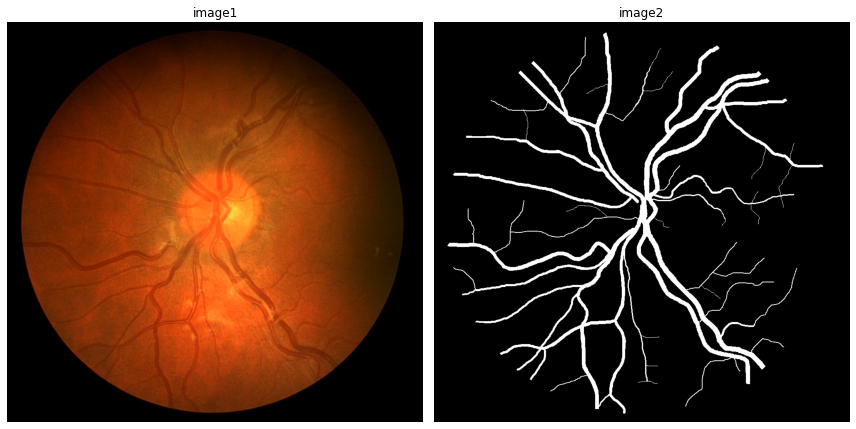

In [62]:
i = 6
print(meta[i])
show_image_pair(im[i], msk[i])